# Homework

In [85]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [86]:
data = 'wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'

In [87]:
!wget $data -O data.csv 

--2024-11-07 00:31:27--  http://wget/
Resolving wget (wget)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘wget’
--2024-11-07 00:31:27--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-07 00:31:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: 

In [88]:
df = pd.read_csv('data.csv')

In [89]:
df.head().T

,0,1,2,3,4
JAMB_Score,192,207,182,210,199
Study_Hours_Per_Week,22,14,29,29,12
Attendance_Rate,78,88,87,99,98
Teacher_Quality,4,4,2,2,3
Distance_To_School,12.4,2.7,9.6,2.6,8.8
School_Type,Public,Public,Public,Public,Public
School_Location,Urban,Rural,Rural,Urban,Urban
Extra_Tutorials,Yes,No,Yes,No,No
Access_To_Learning_Materials,Yes,Yes,Yes,Yes,Yes
Parent_Involvement,High,High,High,Medium,Medium


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [91]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [92]:
df.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [93]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [94]:
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [95]:
# remove the student_id column
df = df.drop(columns=['student_id'])
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [96]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [97]:
df.parent_education_level.unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [98]:
df.parent_education_level.isna().sum()

891

In [99]:
#@ SPLITTING THE DATASET FOR TRAINING AND TEST:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [100]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [101]:
# implement the DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

Question 1

In [102]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [103]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



Which feature is used for splitting the data?
> study_hours_per_week

Questtion 2

In [104]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [105]:
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

42.13724207871227

What's the RMSE of this model on the validation data?
> 42.13

Question 3

In [106]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

  0%|          | 0/20 [00:00<?, ?it/s]

In [107]:
scores

[(10, 42.13724207871227),
 (20, 41.46121464694444),
 (30, 41.106170947924596),
 (40, 40.917193933296545),
 (50, 40.852278663496854),
 (60, 40.78428140159447),
 (70, 40.677098222414024),
 (80, 40.53933283129176),
 (90, 40.50434592594835),
 (100, 40.51680451861919),
 (110, 40.59335280539747),
 (120, 40.6248503681005),
 (130, 40.650840905587195),
 (140, 40.5948515491302),
 (150, 40.596715029667116),
 (160, 40.60350763548252),
 (170, 40.62754627591216),
 (180, 40.641313925139386),
 (190, 40.63135509073867),
 (200, 40.60101912236933)]

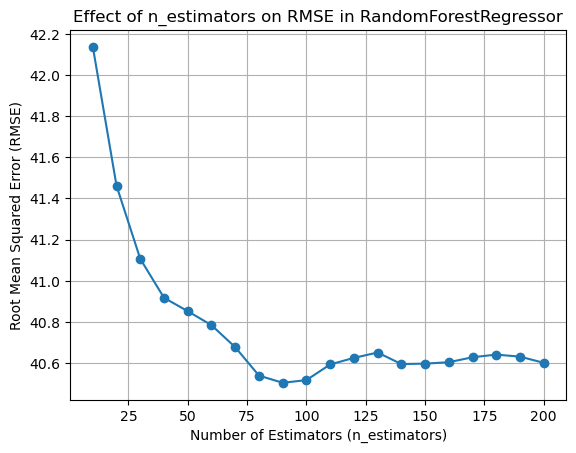

In [108]:
import matplotlib.pyplot as plt

# Plotting the number of estimators vs RMSE
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3), marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of n_estimators on RMSE in RandomForestRegressor")
plt.grid(True)
plt.show()


After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.
> 80

Question 4

In [109]:
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               max_depth=d,
                               random_state=1, n_jobs=-1,
                               warm_start=True)

    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [110]:
scores

[(10, 10, 41.258348648352545),
 (10, 20, 40.88052845942386),
 (10, 30, 40.62495594199098),
 (10, 40, 40.270069249393075),
 (10, 50, 40.31700620909737),
 (10, 60, 40.27703523312143),
 (10, 70, 40.285211180892674),
 (10, 80, 40.21030547138022),
 (10, 90, 40.17389971253662),
 (10, 100, 40.25049014290327),
 (10, 110, 40.286316340858086),
 (10, 120, 40.31532362946843),
 (10, 130, 40.32896060681657),
 (10, 140, 40.29975736944223),
 (10, 150, 40.314326720921464),
 (10, 160, 40.354350211250896),
 (10, 170, 40.36008523133161),
 (10, 180, 40.36419635538415),
 (10, 190, 40.35378105367313),
 (10, 200, 40.32501201024063),
 (15, 10, 42.00397868031699),
 (15, 20, 41.45569853039702),
 (15, 30, 41.16757778438639),
 (15, 40, 40.93059314455314),
 (15, 50, 40.78296985463419),
 (15, 60, 40.72417038106091),
 (15, 70, 40.68941491678856),
 (15, 80, 40.53374870557793),
 (15, 90, 40.49668495181917),
 (15, 100, 40.50481195622743),
 (15, 110, 40.53081914942964),
 (15, 120, 40.58023582410237),
 (15, 130, 40.557808

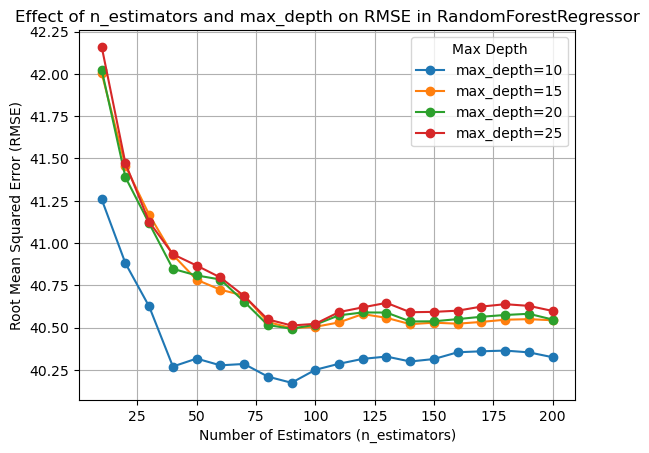

In [111]:
import matplotlib.pyplot as plt

for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'max_depth={d}', marker='o')

# Adding labels and title
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of n_estimators and max_depth on RMSE in RandomForestRegressor")
plt.legend(title="Max Depth")
plt.grid(True)
plt.show()


In [112]:
# Calculate the mean RMSE for each max_depth
mean_rmse_per_depth = df_scores.groupby('max_depth')['rmse'].mean()

# Find the max_depth with the lowest mean RMSE
best_max_depth = mean_rmse_per_depth.idxmin()
best_mean_rmse = mean_rmse_per_depth.min()

# Output the result
print(f"The best max_depth is {best_max_depth} with a mean RMSE of {best_mean_rmse:.3f}")


The best max_depth is 10 with a mean RMSE of 40.392


What's the best max_depth, using the mean RMSE?
> 10

Question 5

In [113]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, 
                           random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [114]:
rf.feature_importances_

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [115]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,access_to_learning_materials=No,0.012325
1,access_to_learning_materials=Yes,0.010262
2,age,0.069311
3,assignments_completed,0.031517
4,attendance_rate,0.149729
5,distance_to_school,0.136486
6,extra_tutorials=No,0.013459
7,extra_tutorials=Yes,0.009131
8,gender=Female,0.009289
9,gender=Male,0.010383


In [116]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311


What's the most important feature?
> study_hours_per_week

In [117]:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [118]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [119]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [120]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [125]:
scores['eta=0.3'] = parse_xgb_output(output)

In [126]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,45.49999,47.00533
1,5,40.17514,43.11181
2,10,37.07490,41.39235
3,15,35.08521,40.61341
4,20,33.67389,40.25010
5,25,32.55850,40.12003
6,30,31.76039,40.13806
7,35,31.01425,40.16103
8,40,30.13427,40.17753
9,45,29.49040,40.27366


In [122]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [123]:
scores['eta=0.1'] = parse_xgb_output(output)

In [127]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,45.49999,47.00533
1,5,40.17514,43.11181
2,10,37.07490,41.39235
3,15,35.08521,40.61341
4,20,33.67389,40.25010
5,25,32.55850,40.12003
6,30,31.76039,40.13806
7,35,31.01425,40.16103
8,40,30.13427,40.17753
9,45,29.49040,40.27366


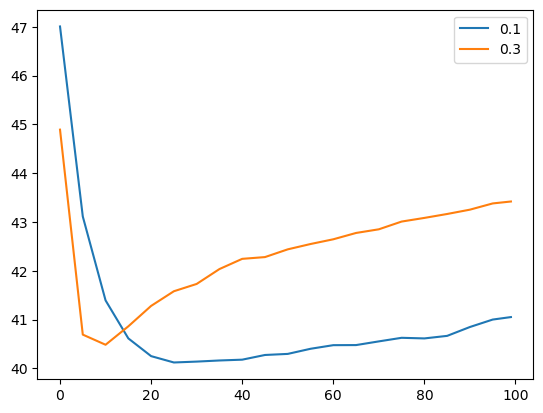

In [124]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()

Which eta leads to the best RMSE score on the validation dataset?
> Both give equal value